<a href="https://colab.research.google.com/github/ProxMaq/ProxVision/blob/main/Metal_coin_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preface 



A. The dataset contains 7 clases. 
(10, 20, 50, 100, 200, 500, 2000) 

B. You can Download the dataset from Kaggle directly to the notebook, for that you have to download the Json file from your kaggle account and upload in the Notebook.
(https://www.kaggle.com/general/74235)


Unzip

In [ ]:
!unzip /content/drive/MyDrive/indian_coins_dataset.rar


Archive:  /content/drive/MyDrive/indian_coins_dataset.rar
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/indian_coins_dataset.rar or
        /content/drive/MyDrive/indian_coins_dataset.rar.zip, and cannot find /content/drive/MyDrive/indian_coins_dataset.rar.ZIP, period.


In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 2s (173 kB/s)
Selecting previously unselected package rar.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!rar a "/content/drive/MyDrive/currency" "/content/drive/MyDrive/indian_coins_dataset.rar"


RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for help

Evaluation copy. Please register.

Corrupt header is foundCorrupt archive - use 'Repair' command
Program aborted


In [ ]:
!unrar x "/content/drive/MyDrive/indian_coins_dataset.rar" "/content/drive/MyDrive/currency"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/indian_coins_dataset.rar

Creating    /content/drive/MyDrive/currency/indian_coins_dataset      OK
Creating    /content/drive/MyDrive/currency/indian_coins_dataset/Train  OK
Creating    /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1  OK
Extracting  /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1/rupee1_001.JPG       0%  OK 
Extracting  /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1/rupee1_002.JPG       0%  OK 
Extracting  /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1/rupee1_003.JPG       0%  OK 
Extracting  /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1/rupee1_004.JPG       0%  OK 
Extracting  /content/drive/MyDrive/currency/indian_coins_dataset/Train/rupee_1/rupee1_005.JPG       0%  OK 
Extracting  /content/drive/MyDrive/currency/indian

#Train Model

A. The Dataset is divided into Train and Validation.

B. We use the Train and Validation to calculate the Accuracy and Losses and the Test to randomly Check Images 

Basic Image generator to train and validate

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/currency/indian_coins_dataset/Train"

train_datagen = ImageDataGenerator( rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30)

VALIDATION_DIR = "/content/drive/MyDrive/currency/indian_coins_dataset/Validate"

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30)

train_generator = train_datagen.flow_from_directory(
	TRAINING_DIR,
	class_mode='categorical',
  batch_size=16
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	class_mode='categorical',
  batch_size=16
)


Found 870 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [ ]:
model = InceptionResNetV2(include_top = False,
                          weights = 'imagenet',
                          input_tensor = None,
                          input_shape = (300,300, 3))






In [ ]:
top_layer = model.output
x = GlobalAveragePooling2D()(top_layer)
op = Dense(4, activation = 'softmax', name = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = op)

In [ ]:
for layer in model_final.layers[:16]:
  layer.trainable = False

for layer in model_final.layers[16:]:
  layer.trainable = True

In [ ]:
 model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
     




In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint('model_resnet_final.h5', monitor = 'val_accuracy', verbose = 1,
                             save_best_only = True, save_weights_only = False,
                             mode = 'auto')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 10,
                      verbose = 1, mode = 'auto')

In [ ]:





IMG_SIZE = (300, 300)
NUM_CLASSES = 4
BATCH_SIZE = 16
NUM_EPOCH = 15
FREEZE_LAYERS = 16 
LEARNING_RATE = 0.0002
DROP_OUT = .2

In [ ]:
import numpy as np

In [ ]:


model.compile(optimizer = Adam(lr = LEARNING_RATE),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(train_generator,
                          steps_per_epoch = np.ceil(len(train_generator) // BATCH_SIZE),
                          validation_data =  validation_generator,
                          validation_steps = 3,
                          epochs = 30,
                          )

Epoch 1/30
3/3 [==============================] - 160s 61s/step - loss: 1.3756 - accuracy: 0.3125 - val_loss: 1.3811 - val_accuracy: 0.3125
Epoch 2/30
3/3 [==============================] - 79s 32s/step - loss: 1.3541 - accuracy: 0.2500 - val_loss: 1.3742 - val_accuracy: 0.3542
Epoch 3/30
3/3 [==============================] - 70s 29s/step - loss: 1.3380 - accuracy: 0.3333 - val_loss: 1.3464 - val_accuracy: 0.3125
Epoch 4/30
3/3 [==============================] - 71s 26s/step - loss: 1.3445 - accuracy: 0.3333 - val_loss: 1.4076 - val_accuracy: 0.3333
Epoch 5/30
3/3 [==============================] - 66s 26s/step - loss: 1.3982 - accuracy: 0.2917 - val_loss: 1.4169 - val_accuracy: 0.2917
Epoch 6/30
3/3 [==============================] - 65s 26s/step - loss: 1.4106 - accuracy: 0.2917 - val_loss: 1.3470 - val_accuracy: 0.3750
Epoch 7/30
3/3 [==============================] - 56s 25s/step - loss: 1.3499 - accuracy: 0.2500 - val_loss: 1.4027 - val_accuracy: 0.2292
Epoch 8/30
3/3 [==========

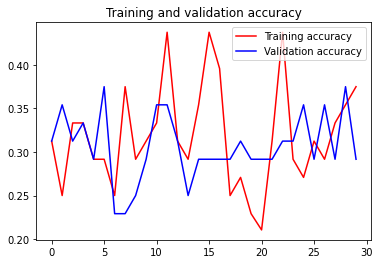

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

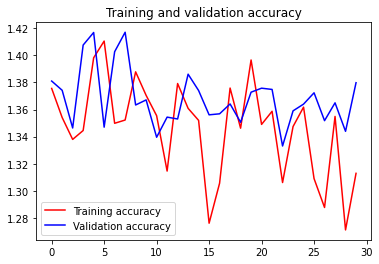

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()